In [1015]:
import math
from sympy import *
init_printing(use_unicode=True)
x =symbols('x')

In [1016]:
from icecream import ic
import random
import pandas as pd
import colorsys

# Uniwersalne funkcje do wyliczania Taylora oraz rysowania wykresow

In [1017]:
def calculateTaylorComponents(func, Nn, x0):
    skladowe = []
    for n in range(0, Nn+1):
        pochodna = diff(func, x, n)
        pochodnaX0 = pochodna.subs(x, x0)
        skladowa = pochodnaX0 / math.factorial(n) * ((x - x0)**n)
        # ic(pochodna, pochodnaX0, skladowa)
        skladowe.append(skladowa)
    return skladowe

def getTaylorSeriesFromComponents(skladowe):
    return sum(skladowe)

def getTaylorSeries(func, Nn, x0):
    return getTaylorSeriesFromComponents(calculateTaylorComponents(func, Nn , x0))

def getColorsHex(numColors):
    colorsHex = []
    for i in range(numColors):
        hue = i / numColors
        saturation = 0.8
        value = 0.8
        rgbColor = colorsys.hsv_to_rgb(hue, saturation, value)
        rHex, gHex, bHex = int(rgbColor[0] * 255), int(rgbColor[1] * 255), int(rgbColor[2] * 255)
        colorHex = "#{:02x}{:02x}{:02x}".format(rHex, gHex, bHex)
        colorsHex.append(colorHex)
    return colorsHex

def getPlots(funcsWithPlotParameters, title, rangeX=(-5, 5), showFinalPlot=True):
    plots = plot(show=False, xlabel='x', ylabel='y', legend=True, title=title, ylim=(-10, 10))
    for fp in funcsWithPlotParameters:
        func = fp.get('func', None)
        if func:
            color = fp.get('color', 'blue')
            label = fp.get('label', '')
            p = plot(func, (x, rangeX[0], rangeX[1]), show=False, line_color=color, label=label, ylim=(-10, 10))
            plots.append(p[0])
    if showFinalPlot:
        plots.show()
    return plots

# Zadanie T1

In [1018]:
def t1(func, Nn, x0):
    ic(func, Nn, x0)
    skladowe = calculateTaylorComponents(func ,Nn, x0)
    szeregTaylora = getTaylorSeriesFromComponents(skladowe)
    ic(skladowe, szeregTaylora)
    # Pierwszy układ wykresów - wykres funkcji i jej N-tego przybliżenia
    wykresFunkcjiOrazTaylora = getPlots([   {'func':func, 'color':"red", 'label':"f(x)"},
                                            {'func':szeregTaylora, 'color':"blue", 'label':"taylor"}],
                                            "Wykres funkcji i jej N-tego przyblizenia", (x0-5, x0+5))
    # Drugi układ wykresów - wykres tailora i wszystkich składowych
    taylorPlotData = [{'func': szeregTaylora, 'color': "red", 'label': "taylor"}]  # Dodanie danych wykresu Taylora
    colors = getColorsHex(len(skladowe))
    for i, skladowa in enumerate(skladowe):
        if skladowa:
            #randomColor = '#' + ''.join([random.choice('123456789ABCDE') for j in range(6)])
            randomColor = colors[i]
            taylorPlotData.extend([{'func': skladowa, 'color': randomColor, 'label': f"a{i}"}]) # Dodanie danych wykresow skladowych
    wykresTayloraOrazSkladowych = getPlots(taylorPlotData, "Wykres taylora oraz wykresy jego skladowych", (x0-5, x0+5))
    return [s for s in skladowe if s != 0], szeregTaylora, wykresFunkcjiOrazTaylora, wykresTayloraOrazSkladowych

ic| func: exp(x), Nn: 7, x0: 0
ic| skladowe: [1, x, x**2/2, x**3/6, x**4/24, x**5/120, x**6/720, x**7/5040]
    szeregTaylora: x**7/5040 + x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1


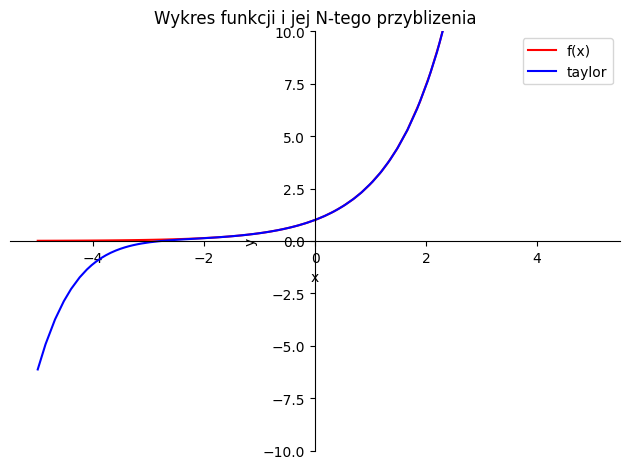

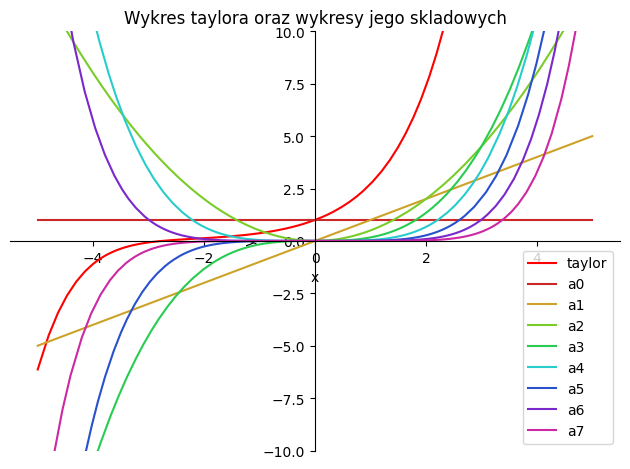

[1, x, x**2/2, x**3/6, x**4/24, x**5/120, x**6/720, x**7/5040]
x**7/5040 + x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1


In [1019]:
# t1Func = sin(x)
t1Func = E**x
# t1Func = 1/x
t1N = 7
t1X0 = 0
# t1X0 = 1
w1, w2, w3, w4 = t1(t1Func, t1N, t1X0)
print(w1)
print(w2)

# Zadanie T2

In [1020]:
def t2(func, N1, N2, x0):
    ic(func, N1, N2, x0)
    przyblizenia = []
    skladowe = calculateTaylorComponents(func, N2, x0)
    for i in range(N1, N2+1):
        taylor = getTaylorSeriesFromComponents(skladowe[:i+1])
        ic(f"Taylor od i = {i}", taylor)
        przyblizenia.append(taylor)
    ic(przyblizenia)
    # Wykres funkcji i wszystkich przyblizen od N1 do N2
    functionPlotData = [{'func': func, 'color': "red", 'label': "f(x)"}]  # Dodanie danych wykresu Funkcji
    colors = getColorsHex(len(przyblizenia))
    for i, przyblizenie in enumerate(przyblizenia):
        if przyblizenie:
            randomColor = colors[i]
            # randomColor = '#' + ''.join([random.choice('123456789ABCDE') for j in range(6)])
            functionPlotData.extend([{'func': przyblizenie, 'color': randomColor, 'label': f"taylor{N1+i}"}]) # Dodanie danych wykresow przyblizen
    wykresFunkcjiOrazJejPrzyblizen = getPlots(functionPlotData, "Wykres funkcji f(x) oraz jej przyblizen", (x0-5, x0+5))
    return przyblizenia, wykresFunkcjiOrazJejPrzyblizen

ic| func: exp(x), N1: 3, N2: 7, x0: 0
ic| f"Taylor od i = {i}": 'Taylor od i = 3'
    taylor: x**3/6 + x**2/2 + x + 1
ic| f"Taylor od i = {i}": 'Taylor od i = 4'
    taylor: x**4/24 + x**3/6 + x**2/2 + x + 1
ic| f"Taylor od i = {i}": 'Taylor od i = 5'
    taylor: x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1
ic| f"Taylor od i = {i}": 'Taylor od i = 6'
    taylor: x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1
ic| f"Taylor od i = {i}": 'Taylor od i = 7'
    taylor: x**7/5040 + x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1
ic| przyblizenia: [x**3/6 + x**2/2 + x + 1,
                   x**4/24 + x**3/6 + x**2/2 + x + 1,
                   x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1,
                   x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1,
                   x**7/5040 + x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1]


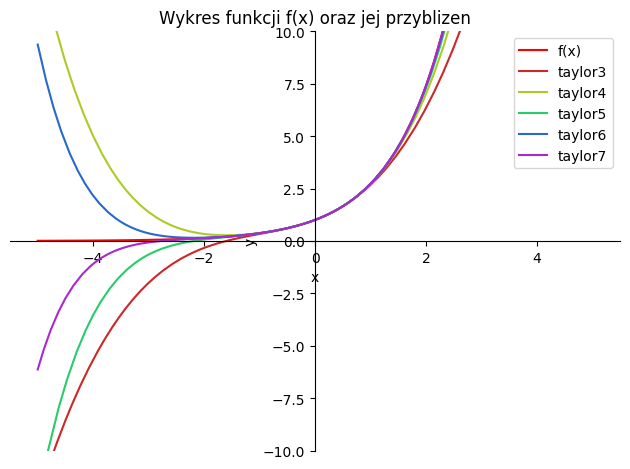

In [1021]:
# t2Func = sin(x)
t2Func = t1Func
t2N1 = 3
t2N2 = 7
# t2X0 = 0
t2X0 = t1X0
w1, w2 = t2(t2Func, t2N1, t2N2, t2X0)

# Zadanie T3

In [1022]:
t3Func1 = cos(x)
t3Func2 = 1 / (1-x)
t3Func3 = log(1 / (1-x))

t3Maclaurin1 = getTaylorSeries(t3Func1, 5 ,0)
t3Maclaurin2 = getTaylorSeries(t3Func2, 5 ,0)
t3Maclaurin3 = getTaylorSeries(t3Func3, 5 ,0)

ic(t3Maclaurin1)
ic(t3Maclaurin2)
ic(t3Maclaurin3)

# t34 = log(1-x)
# t34r = getTaylorSeries(t34, 5 , 0)
# ic(t34r)

ic| t3Maclaurin1: x**4/24 - x**2/2 + 1
ic| t3Maclaurin2: x**5 + x**4 + x**3 + x**2 + x + 1
ic| t3Maclaurin3: x**5/5 + x**4/4 + x**3/3 + x**2/2 + x


# Uniwersalne funkcje do wyliczania Fouriera

In [1023]:
def calculateFourierComponents(func, Nn):
    a0 = 1 / pi * integrate(func, (x, -1 * pi, pi)) / 2 # od razu podzielone na 2
    # ic(a0)
    skladowe = []
    for n in range(1, Nn+1):
        an = 1 / pi * integrate(func * cos(n*x), (x, -1 * pi, pi))
        bn = 1 / pi * integrate(func * sin(n*x), (x, -1 * pi, pi))
        skladowa = an * cos(n*x) + bn * sin(n*x)
        # ic(n, an, bn, skladowa)
        skladowe.append(skladowa)
    return a0, skladowe

def getFourierSeriesFromComponents(a0, skladowe):
    return a0 + sum(skladowe)

def getFourierSeries(func, Nn):
    return getFourierSeriesFromComponents(*calculateFourierComponents(func, Nn))

# Zadanie F1

In [1024]:
def f1(func, Nn):
    ic(func, Nn)
    a0, skladowe = calculateFourierComponents(func ,Nn)
    szeregFouriera = getFourierSeriesFromComponents(a0, skladowe)
    ic(a0, skladowe, szeregFouriera)
    # Układ wykresów - wykres funkcji, wykres N-tego przybliżenia oraz wykres skladowych
    fourierPlotData = [{'func': func, 'color': "red", 'label': "f(x)"}, {'func': szeregFouriera, 'color': "blue", 'label': "fourier"}, {'func': a0, 'color': "yellow", 'label': "a0 /2 "}]  # Dodanie danych wykresu Funkcji i Fouriera
    colors = getColorsHex(len(skladowe))
    for i, skladowa in enumerate(skladowe):
        if skladowa:
            randomColor = colors[i]
            #randomColor = '#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
            fourierPlotData.extend([{'func': skladowa, 'color': randomColor, 'label': f"skladowa{i+1}"}]) # Dodanie danych wykresow skladowych
    wykresFunkcjiFurieraISkladowych = getPlots(fourierPlotData, "Wykres funkcji, fouriera i skladowych", (-4, 4))
    return [s for s in skladowe if s != 0], szeregFouriera, wykresFunkcjiFurieraISkladowych

ic| func: Piecewise((pi, (x < 0) & (x > -pi)), (pi - x, (x > 0) & (x < pi)))
    Nn: 3
ic| a0: 3*pi/4
    skladowe: [-sin(x) + 2*cos(x)/pi, sin(2*x)/2, -sin(3*x)/3 + 2*cos(3*x)/(9*pi)]
    szeregFouriera: -sin(x) + sin(2*x)/2 - sin(3*x)/3 + 2*cos(x)/pi + 2*cos(3*x)/(9*pi) + 3*pi/4


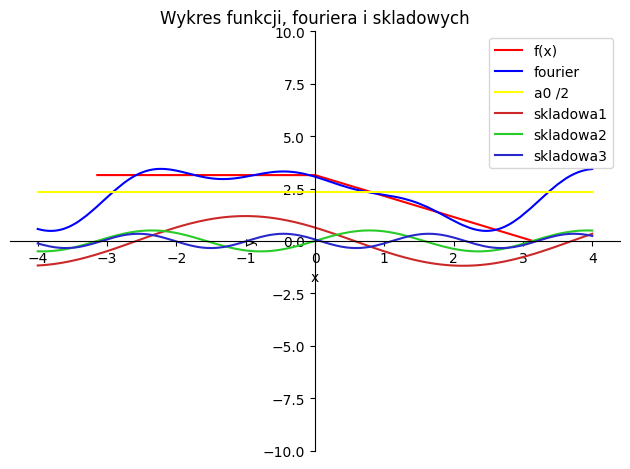

[-sin(x) + 2*cos(x)/pi, sin(2*x)/2, -sin(3*x)/3 + 2*cos(3*x)/(9*pi)]
-sin(x) + sin(2*x)/2 - sin(3*x)/3 + 2*cos(x)/pi + 2*cos(3*x)/(9*pi) + 3*pi/4


In [1025]:
# f1Func = Piecewise(
#     (-1, (x > -pi) & (x < 0)),
#     (0, x == 0),
#     (1, (x > 0) & (x < pi))
# )
f1Func = Piecewise(
    (pi, (x > -pi) & (x < 0)),
    (pi, x == 0),
    (pi - x, (x > 0) & (x < pi))
)
# f1Func = Piecewise(
#     (x + pi, (x >= -pi) & (x < 0)),
#     (0, x == 0),
#     (x**2 - pi**2, (x > 0) & (x <= pi))
# )
f1N = 3


w1, w2, w3 = f1(f1Func, f1N)
print(w1)
print(w2)

# Zadanie F2

In [1026]:
def f2(func, N1, N2):
    ic(func, N1, N2)
    przyblizenia = []
    a0, skladowe = calculateFourierComponents(func, N2)
    for i in range(N1, N2+1):
        fourier = getFourierSeriesFromComponents(a0, skladowe[:i])
        # ic(f"Fourier od i = {i}", fourier)
        przyblizenia.append(fourier)
    ic(przyblizenia)
    # Wykres funkcji i wszystkich przyblizen od N1 do N2
    functionPlotData = [{'func': func, 'color': "red", 'label': "f(x)"}]  # Dodanie danych wykresu Funkcji
    colors = getColorsHex(len(przyblizenia))
    for i, przyblizenie in enumerate(przyblizenia):
        if przyblizenie:
            randomColor = colors[i]
            # randomColor = '#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
            functionPlotData.extend([{'func': przyblizenie, 'color': randomColor, 'label': f"fourier{N1+i}"}]) # Dodanie danych wykresow przyblizen
    wykresFunkcjiOrazJejPrzyblizen = getPlots(functionPlotData, "Wykres funkcji f(x) oraz jej przyblizen", (-4, 4))
    return przyblizenia, wykresFunkcjiOrazJejPrzyblizen

ic| func: Piecewise((pi, (x < 0) & (x > -pi)), (pi - x, (x > 0) & (x < pi)))
    N1: 1
    N2: 5
ic| przyblizenia: [-sin(x) + 2*cos(x)/pi + 3*pi/4,
                   -sin(x) + sin(2*x)/2 + 2*cos(x)/pi + 3*pi/4,
                   -sin(x) + sin(2*x)/2 - sin(3*x)/3 + 2*cos(x)/pi + 2*cos(3*x)/(9*pi) + 3*pi/4,
                   -sin(x) + sin(2*x)/2 - sin(3*x)/3 + sin(4*x)/4 + 2*cos(x)/pi + 2*cos(3*x)/(9*pi) + 3*pi/4,
                   -sin(x) + sin(2*x)/2 - sin(3*x)/3 + sin(4*x)/4 - sin(5*x)/5 + 2*cos(x)/pi + 2*cos(3*x)/(9*pi) + 2*cos(5*x)/(25*pi) + 3*pi/4]


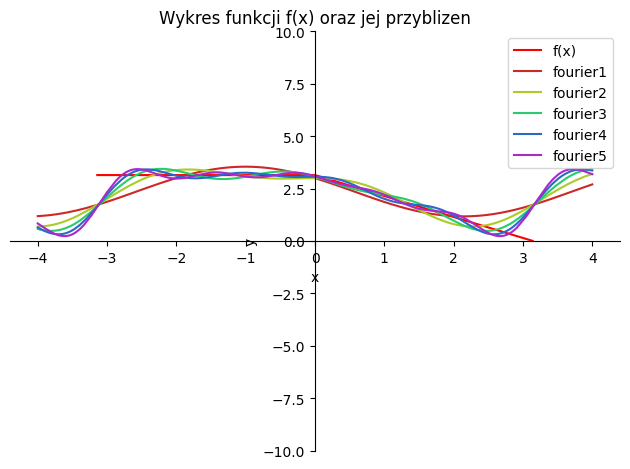

[-sin(x) + 2*cos(x)/pi + 3*pi/4, -sin(x) + sin(2*x)/2 + 2*cos(x)/pi + 3*pi/4, -sin(x) + sin(2*x)/2 - sin(3*x)/3 + 2*cos(x)/pi + 2*cos(3*x)/(9*pi) + 3*pi/4, -sin(x) + sin(2*x)/2 - sin(3*x)/3 + sin(4*x)/4 + 2*cos(x)/pi + 2*cos(3*x)/(9*pi) + 3*pi/4, -sin(x) + sin(2*x)/2 - sin(3*x)/3 + sin(4*x)/4 - sin(5*x)/5 + 2*cos(x)/pi + 2*cos(3*x)/(9*pi) + 2*cos(5*x)/(25*pi) + 3*pi/4]
Plot object containing:
[0]: cartesian line: Piecewise((pi, (x < 0) & (x > -pi)), (pi - x, (x > 0) & (x < pi))) for x over (-4.0, 4.0)
[1]: cartesian line: -sin(x) + 2*cos(x)/pi + 3*pi/4 for x over (-4.0, 4.0)
[2]: cartesian line: -sin(x) + sin(2*x)/2 + 2*cos(x)/pi + 3*pi/4 for x over (-4.0, 4.0)
[3]: cartesian line: -sin(x) + sin(2*x)/2 - sin(3*x)/3 + 2*cos(x)/pi + 2*cos(3*x)/(9*pi) + 3*pi/4 for x over (-4.0, 4.0)
[4]: cartesian line: -sin(x) + sin(2*x)/2 - sin(3*x)/3 + sin(4*x)/4 + 2*cos(x)/pi + 2*cos(3*x)/(9*pi) + 3*pi/4 for x over (-4.0, 4.0)
[5]: cartesian line: -sin(x) + sin(2*x)/2 - sin(3*x)/3 + sin(4*x)/4 - sin(5

In [1027]:
f2Func = f1Func
f2N1 = 1
f2N2 = 5
w1, w2 = f2(f2Func, f2N1, f2N2)
print(w1)
print(w2)

# Zadanie F3

In [1028]:
def getFourierSubcomponents(func, Nn):
    a0 = 1 / pi * integrate(func, (x, -1 * pi, pi))
    elementyAiB = [{"a0":a0, "b0":0}]
    for n in range(1, Nn+1):
        an = 1 / pi * integrate(func * cos(n*x), (x, -1 * pi, pi))
        bn = 1 / pi * integrate(func * sin(n*x), (x, -1 * pi, pi))
        elementyAiB.append({f"a{n}":an, f"b{n}":bn})
    return elementyAiB

def displayFourierSubcomponents(func, Nn):
    elements = getFourierSubcomponents(func, Nn)
    for i, n in enumerate(elements):
        print(f"a{i} = {n[f'a{i}']}\nb{i} = {n[f'b{i}']}")

def countFourierFunctions(pFunction, pValues, numbers):
    resultTable = []
    rowCounter = 0
    for number in numbers:
        resultTable.append([])
        resultFourierFunction = getFourierSeries(pFunction, number).simplify()
        # resultFourierFunctionString = str(resultFourierFunction)[:120] + ('...' if len(str(resultFourierFunction)) > 120 else '')
        for pValue in pValues:
            resultValue = round(resultFourierFunction.subs(x, pValue), 3)
            #print(f"Wartość: {str(pValue):<10} N:{number} wynosi: {resultFourierFunctionString:<125} = {resultValue}")
            resultTable[rowCounter].append(resultValue)
        rowCounter += 1
    resultTable.append([])
    for pValue in pValues:
        functionValue = round(pFunction.subs(x, pValue), 3)
        resultTable[rowCounter].append(functionValue)
        #print(f"Funkcja {pFunction} dla wartości: {str(pValue):<10} = {functionValue}")
    return resultTable

f3Func = Piecewise(
    (x + pi, (x >= -pi) & (x < 0)),
    (0, x == 0),
    (x**2 - pi**2, (x > 0) & (x <= pi))
)

In [1029]:
displayFourierSubcomponents(f3Func, 9)

a0 = (-2*pi**3/3 + pi**2/2)/pi
b0 = 0
a1 = (2 - 2*pi)/pi
b1 = (-pi**2 - 4 - pi)/pi
a2 = 1/2
b2 = (-pi**2/2 - pi/2)/pi
a3 = (2/9 - 2*pi/9)/pi
b3 = (-pi**2/3 - pi/3 - 4/27)/pi
a4 = 1/8
b4 = (-pi**2/4 - pi/4)/pi
a5 = (2/25 - 2*pi/25)/pi
b5 = (-pi**2/5 - pi/5 - 4/125)/pi
a6 = 1/18
b6 = (-pi**2/6 - pi/6)/pi
a7 = (2/49 - 2*pi/49)/pi
b7 = (-pi**2/7 - pi/7 - 4/343)/pi
a8 = 1/32
b8 = (-pi**2/8 - pi/8)/pi
a9 = (2/81 - 2*pi/81)/pi
b9 = (-pi**2/9 - pi/9 - 4/729)/pi


In [1032]:
exampleFunctions = (-3*pi/4, -1*pi/2, -1*pi/4, pi/4, pi/2, 3*pi/4)
exampleNs = [i for i in range(9)] #(2, 5, 8)
f3resultTableValues = countFourierFunctions(f3Func, exampleFunctions, exampleNs)
# print(f3resultTableValues)
f3resultTable = pd.DataFrame(f3resultTableValues, columns=exampleFunctions)
newIndexes = [f"f({n})" for n in exampleNs]
newIndexes.append("f(x)")
f3resultTable.index = newIndexes
f3resultTable

,-3*pi/4,-pi/2,-pi/4,pi/4,pi/2,3*pi/4
f(0),-2.504,-2.504,-2.504,-2.504,-2.504,-2.504
f(1),2.288,2.910,0.360,-7.297,-7.919,-5.369
f(2),0.218,2.410,2.431,-9.368,-8.419,-3.298
f(3),1.120,0.983,3.548,-10.271,-6.992,-4.415
f(4),0.995,1.108,3.423,-10.396,-6.867,-4.540
f(5),0.364,1.946,2.868,-9.764,-7.705,-3.986
f(6),1.054,1.891,2.178,-9.074,-7.761,-4.676
f(7),0.653,1.295,1.738,-8.673,-7.165,-4.235
f(8),0.684,1.327,1.769,-8.641,-7.134,-4.204
f(x),0.785,1.571,2.356,-9.253,-7.402,-4.318


In [1033]:
# # Tabela pomocnicza z różnicami względem f(x) dla sprawdzenia poprawnosci
# fxValues = f3resultTable.loc["f(x)"]
# differenceTable = f3resultTable.subtract(fxValues, axis=1).abs().round(3)
# differenceTable

# Zadanie F4

# Zadanie F5

# Zadanie F6